<a href="https://colab.research.google.com/github/DevJaepaL/OpenCV/blob/main/%EA%B8%B0%ED%95%98%ED%95%99%EC%A0%81_%EB%B3%80%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**기하학적 변환이란 ?**

  크기, 회전, 반사, 이동 등의 여러가지 변환들이 있으며,
  픽셀 좌표들의 위치를 변경하여 재배치함으로써 영상의    해석을 용이하게 한다.

  기하학적 변환을 통해 영상을 해석하기 알맞은 기하학으로 바꿈으로써 영상의 의미를 더욱 잘 파악할 수 있음.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
original image (210, 320)


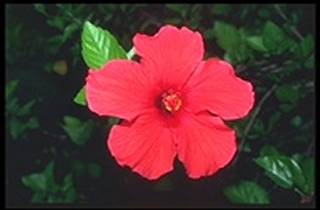

Nearest Neighbor Interpolation (105, 160)


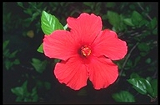

Linear Interpolation (105, 160)


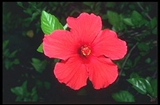

Nearest Neighbor Interpolation(*2) (105, 160)


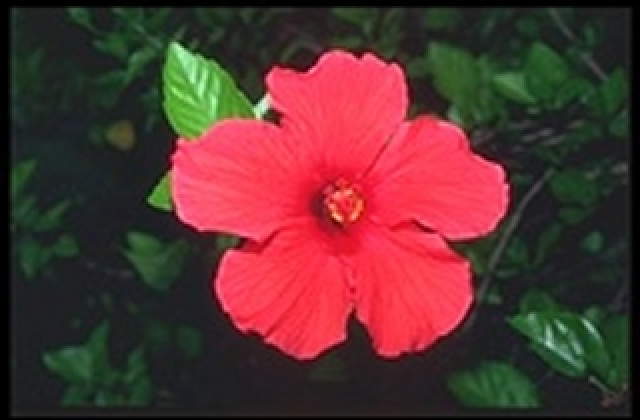

Linear Interpolation(*2) (105, 160)


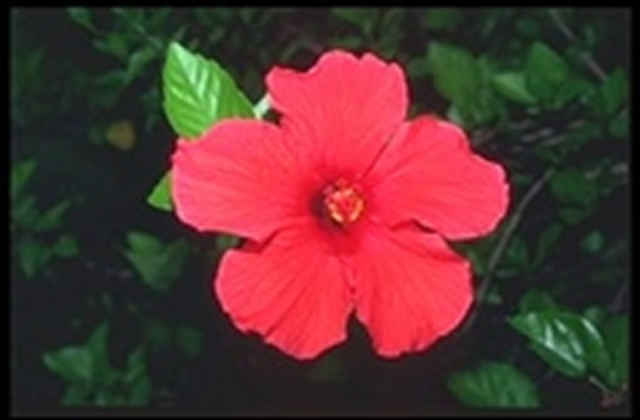

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive') 
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/flower.bmp')

height, width = img.shape[:2]
output_img = cv2.resize(img,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_NEAREST)
output_img2 = cv2.resize(img,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
output_img3 = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_NEAREST)
output_img4 = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_LINEAR)

#----------------------
#      Print IMG
#======================
print("original image",img.shape[:2] )
cv2_imshow(img)
print("Nearest Neighbor Interpolation",output_img.shape[:2])
cv2_imshow(output_img)
print("Linear Interpolation", output_img2.shape[:2])
cv2_imshow(output_img2)
print("Nearest Neighbor Interpolation(*2)",output_img.shape[:2])
cv2_imshow(output_img3)
print("Linear Interpolation(*2)", output_img2.shape[:2])
cv2_imshow(output_img4)



**아래의 코드는 파이썬을 이용해, 양산형 보간법을 구현한 코드이다.**

첫번째 코드는 최근접 이웃 보간법,

두번째 코드는 양선형 보간법을 작성.



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
zoom shape is:  (316, 284) image shape is:  (79, 71) 

original image (79, 71)


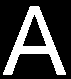

Nearest Neighbor Interpolation (316, 284)


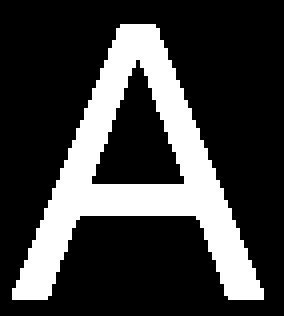

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
from math import floor
from skimage.io import imread


#----------------------------------
# Euclidian Distance
#==================================
def euclidian_dist(a,b):
    '''
    Euclidian distance between 2 points a(x_a, y_a) and b(x_b, y_b)
    Distance = Square Root ( (x_a - x_b)^2 +  (y_a - y_b)^2 )
    '''
    return np.sqrt(((a[0]-b[0])**2)+((a[1]-b[1])**2))

#----------------------------------
# Nearest Neighbour
#==================================
def near_neighbour(X,P):
    '''
    The nearest neighbour of point X(x,y) to the centroid P(x_p, y_p)
    The Neighbourhood is defined by the Upper-Left corner of the point X, which means 3 neighbours and the point X. 
    '''
    i,j = X[0],X[1]
    A = [[i,j],[i,j+1],[i+1,j],[i+1,j+1]]
    dist = [euclidian_dist(A[0],P),euclidian_dist(A[1],P),euclidian_dist(A[2],P),euclidian_dist(A[3],P)]
    minpos = dist.index(min(dist))
    return A[minpos]        

#----------------------------------
# Nearest Neighbour Interpolation
#==================================
def NN_interpolation(im,scale_factor):
    '''
    Interpolation of the image im with scale factor scale_factor, using Nearest Neighbour.
    '''
    row, col = im.shape[0], im.shape[1]
    n_row,n_col = int(scale_factor * row),int(scale_factor * col)
    # fill in  img
    zoom = np.arange(n_row*n_col).reshape(n_row,n_col)
    print("zoom shape is: ",zoom.shape,"image shape is: ", im.shape,'\n')
    for i in range(n_row):
        for j in range(n_col):
            P = [floor(float(i)/scale_factor),floor(float(j)/scale_factor)]
            X = [int(i) for i in P]
            zoom[i][j] = im[near_neighbour(X,P)[0]][near_neighbour(X,P)[1]]
    return zoom



drive.mount('/content/gdrive') 
#영상 불러오기
#im = cv2.imread('/content/gdrive/My Drive/Image_Processing/small-a.bmp')
img = imread('/content/gdrive/My Drive/Image_Processing/small-a.bmp')[...,0]

out = NN_interpolation(img,4.0)

#----------------------
#      Print IMG
#======================
print("original image",img.shape[:2] )
cv2_imshow(img)
print("Nearest Neighbor Interpolation",out.shape[:2])
cv2_imshow(out)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
org (79, 71)


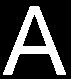

Bilinear Interpolation (316, 284)


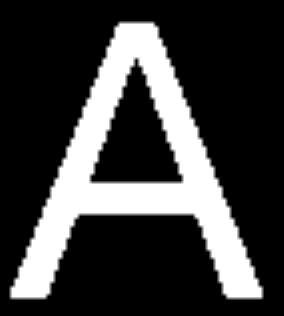

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

#----------------------------------
# Bilinear Interpolation
#==================================

def interpolate_bilinear(array_in, width_in, height_in, array_out, width_out, height_out):
    for i in range(height_out):
        for j in range(width_out):
            # Relative coordinates of the pixel in output space
            x_out = j / width_out
            y_out = i / height_out

            # Corresponding absolute coordinates of the pixel in input space
            x_in = (x_out * width_in)
            y_in = (y_out * height_in)

            # Nearest neighbours coordinates in input space
            x_prev = int(np.floor(x_in))
            x_next = x_prev + 1
            y_prev = int(np.floor(y_in))
            y_next = y_prev + 1

            # Sanitize bounds - no need to check for < 0
            x_prev = min(x_prev, width_in - 1)
            x_next = min(x_next, width_in - 1)
            y_prev = min(y_prev, height_in - 1)
            y_next = min(y_next, height_in - 1)
            
            # Distances between neighbour nodes in input space
            Dy_next = y_next - y_in;
            Dy_prev = 1. - Dy_next; # because next - prev = 1
            Dx_next = x_next - x_in;
            Dx_prev = 1. - Dx_next; # because next - prev = 1
            
            # Interpolate over 3 RGB layers
            for c in range(3):
                array_out[i][j][c] = Dy_prev * (array_in[y_next][x_prev][c] * Dx_next + array_in[y_next][x_next][c] * Dx_prev) \
                + Dy_next * (array_in[y_prev][x_prev][c] * Dx_next + array_in[y_prev][x_next][c] * Dx_prev)
                
    return array_out

drive.mount('/content/gdrive') 
#영상 불러오기
im = cv2.imread('/content/gdrive/My Drive/Image_Processing/small-a.bmp')

height, width = im.shape[:2]
width_2 = width * 4
height_2 = height * 4

# Interpolate in float64
out = np.zeros((height_2, width_2, 3))
out = interpolate_bilinear(im, width, height, out, width_2, height_2)

#----------------------
#      Print IMG
#======================
print("org",im.shape[:2])
cv2_imshow(im)

print("Bilinear Interpolation",out.shape[:2])
cv2_imshow(out)



**회전 변환(Rotation)**

일정 각도로 영상을 회전시키는 변환으로써, 기울어진 영상을 보기 좋게 바꾸는데 주로 사용되며 영상의 전처리로 많이 사용되는 변환이다.

-회전 변환 과정-


1.   입력 영상을 원점 좌표로 이동
2.   원점 좌표를 중심으로 sin 각도만큼 회전
3.   다시 원래 좌표로 이동

기본적으로 OpenCV 환경에서 

getRotationMatrix2D() 함수와 warpAffine() 함수가 제공된다. 


---


```
Mat cv:getRotationMatrix2D  (
  Point2f center,
  double  angle,
  double  scale
)

# center : 소스 영상의 회전 중심
# angle  : 회전 각도 ( 양수 값은 시계 반대 방향 회전을 의미)
# scale  : 등방성(Isotropic) 스케일 계수, 영상의 크기를 변화시키면서 회전시킬 때 사용됨.

void cv::warpAffine  (
  InputArray  src,
  OutputArray dst,
  InputArray  M,
  Size  dsize,
  int   flags = INTER_LINEAR,
  int   borderMode = BORDER_CONSTANT,
  const Scalar & boderValue = Scalar()
)

# src : 입력영상
# dst : 출력영상
# M   : 변환행렬
# dsize : 출력영상의 크기
# flags : 보간법
# borderMode : 픽셀 외샵방법
# borderValue : Default 0
```



---



아래 코드를 통해 예제가 확인이 가능하다.



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
original image (210, 320)


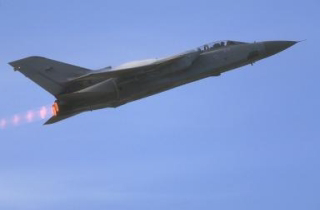

Rotation Transformation (210, 320)


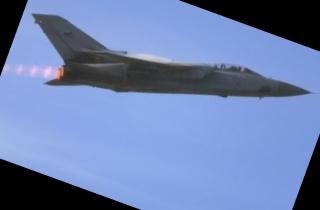

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive') 
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/airplane.bmp')

rows,cols = img.shape[:2]
# 회전점을 영상 모서리 -> 영상의 중심으로 변경
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),-20,1)
output_img = cv2.warpAffine(img,M,(cols*1,rows*1),flags = cv2.INTER_LINEAR)

#----------------------
#      Print IMG
#======================
print("original image",img.shape[:2] )
cv2_imshow(img)
print("Rotation Transformation",output_img.shape[:2])
cv2_imshow(output_img)

아래 코드는 OpenCV에서 제공하는 라이브러리 함수가 아닌,
파이썬 코드를 직접 짜서 Rotate를 구현한 것 이다.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
original image (210, 320)


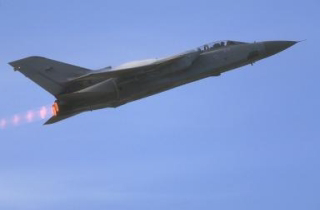

Rotation Transformation (320, 210)


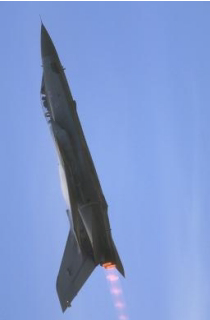

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
from skimage.io import imread


def rotate_coords(x, y, theta, ox, oy):
    """Rotate arrays of coordinates x and y by theta radians about the
    point (ox, oy).

    """
    s, c = np.sin(theta), np.cos(theta)
    x, y = np.asarray(x) - ox, np.asarray(y) - oy
    return x * c - y * s + ox, x * s + y * c + oy

def rotate_image(src, theta, ox, oy, fill=255):
    """Rotate the image src by theta radians about (ox, oy).
    Pixels in the result that don't correspond to pixels in src are
    replaced by the value fill.

    """
    # Images have origin at the top left, so negate the angle.
    theta = -theta

    # Dimensions of source image. Note that scipy.misc.imread loads
    # images in row-major order, so src.shape gives (height, width).
    sh, sw = src.shape[:2]

    # Rotated positions of the corners of the source image.
    cx, cy = rotate_coords([0, sw, sw, 0], [0, 0, sh, sh], theta, ox, oy)

    # Determine dimensions of destination image.
    dw, dh = (int(np.ceil(c.max() - c.min())) for c in (cx, cy))

    # Coordinates of pixels in destination image.
    dx, dy = np.meshgrid(np.arange(dw), np.arange(dh))

    # Corresponding coordinates in source image. Since we are
    # transforming dest-to-src here, the rotation is negated.
    sx, sy = rotate_coords(dx + cx.min(), dy + cy.min(), -theta, ox, oy)

    # Select nearest neighbour.
    sx, sy = sx.round().astype(int), sy.round().astype(int)

    # Mask for valid coordinates.
    mask = (0 <= sx) & (sx < sw) & (0 <= sy) & (sy < sh)

    # Create destination image.
    dest = np.empty(shape=(dh, dw), dtype=src.dtype)

    # Copy valid coordinates from source image.
    dest[dy[mask], dx[mask]] = src[sy[mask], sx[mask]]

    # Fill invalid coordinates.
    dest[dy[~mask], dx[~mask]] = fill

    return dest


drive.mount('/content/gdrive') 
#영상 불러오기
img1 = cv2.imread('/content/gdrive/My Drive/Image_Processing/airplane.bmp')
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

R_img, G_img, B_img = cv2.split(img)


output_img1 = rotate_image(R_img, 90* np.pi / 180, 100, 100)
output_img2 = rotate_image(G_img, 90 * np.pi / 180, 100, 100)
output_img3 = rotate_image(B_img, 90 * np.pi / 180, 100, 100)

out_img = np.zeros((output_img1.shape[0], output_img1.shape[1],3), dtype=np.ubyte)
out_img[:,:,2] = output_img1
out_img[:,:,1] = output_img2
out_img[:,:,0] = output_img3
#----------------------
#      Print IMG
#======================
print("original image",img1.shape[:2] )
cv2_imshow(img1)
print("Rotation Transformation",out_img.shape[:2])
cv2_imshow(out_img)



**대칭 변환(Flipping Transform)**

영상을 특정 축이나 점에 대해 반사시키는 변환으로, 다른 기하학적 변환과 마찬가지로 영상의 전처리에 많이 사용된다.

OpenCV에서 제공되는 flip() 함수 사용.



---



```
void cv::flip   (
  InputArray  src,
  OutputArray dst,
  int     flipCode
)

# src : 입력영상
# dst : 출력영상
# flipCode : 배열을 어떻게 뒤집을 것인가에 대한 플래그.
             0은 x 축을 기준으로 대칭 이동을 의미.
             양수 값(Ex : 1)은 y 축을 기준으로 대칭 이동을 의미.
             음수 값(Ex : -1)은 두 개의 축을 중심으로 대칭 이동을 의미. 
```



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


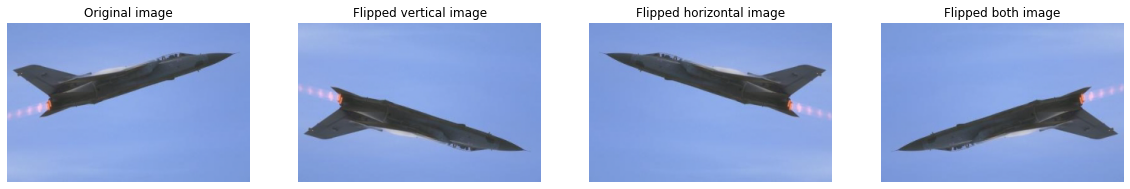

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive') 
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/airplane.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flip
flipVertical = cv2.flip(img, 0) #가로축 기준
flipHorizontal = cv2.flip(img, 1)  #세로축 기준
flipBoth = cv2.flip(img, -1)  #두축 중심으로 대칭

"""
for x in range(height):
    for y in range(width):
        xp = height - x - 1       #상하 반전
        yp = width - y - 1        #좌우 반전
        output1[x,y] = img[xp, y] #상하 반전
        output2[x, y] = img[x, yp] #좌우 반전
"""
#----------------------
#      Print IMG
#======================
plt.figure(figsize=(20,20)) # 이미지 원본의 크기를 키워준다.
plt.subplot(1,4,1)
plt.title("Original image")
plt.imshow(img)
plt.axis("off")
plt.subplot(1,4,2)
plt.title("Flipped vertical image")
plt.imshow(flipVertical)
plt.axis("off")
plt.subplot(1,4,3)
plt.title("Flipped horizontal image")
plt.imshow(flipHorizontal)
plt.axis("off")
plt.subplot(1,4,4)
plt.title("Flipped both image")
plt.imshow(flipBoth)
plt.axis("off")
plt.show()

**이동 변환(Translation)**

입력 영상의 각 요소들을 결과 영상의 새로운 위치로 매핑 시키는 변환

OpenCV에서 제공되는 warpAffine() 함수를 사용한다.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
original image size: (210, 320)


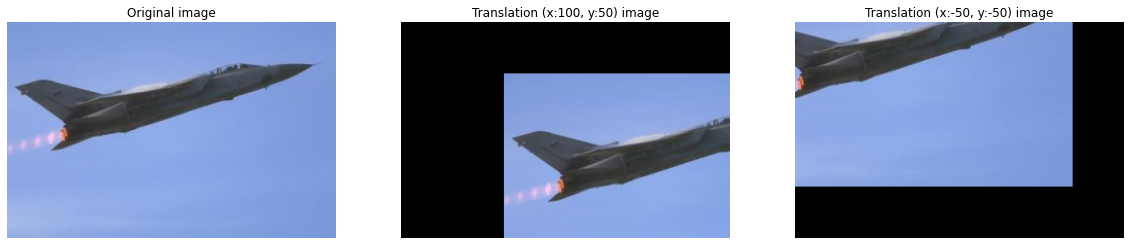

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive') 
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/airplane.bmp')
# BGR영상을 RGB영상으로 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

height,width = img.shape[:2]
M = np.float32([[1,0,100],[0,1,50]])
out1 = cv2.warpAffine(img,M,(width,height))
M = np.float32([[1,0,-50],[0,1,-50]])
out2 = cv2.warpAffine(img,M,(width,height))

#----------------------
#      Print IMG
#======================
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
print("original image size:",img.shape[:2] )
plt.title("Original image")
plt.imshow(img)
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Translation (x:100, y:50) image")
plt.imshow(out1)
plt.axis("off")
plt.subplot(1,3,3)
plt.title("Translation (x:-50, y:-50) image")
plt.imshow(out2)
plt.axis("off")
plt.show()

**어파인 변환(Affine Transform)**

선형의 2차원 변환을 통해 영상을 변환시키는 방법으로 , 크기 변환, 회전, 반사, 이동과 같은 변환들의 선형 결합 연산을 통해 새로운 좌표로 매핑시키는 변환

하나의 변환만 포함 될 수도 있고, 여러 개의 변환을 포함할 수도 있음.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Original image


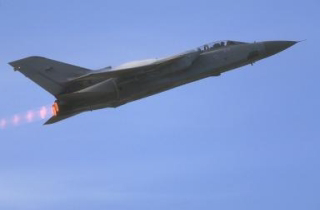

Scaling image


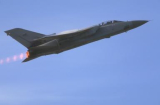

Rotation (45 degree) image


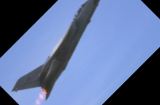

Translation (x:+30, y:+20) image


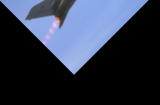

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/airplane.bmp')
#영상 크기변환
resize = cv2.resize(img,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
height,width = resize.shape[:2]

# 회전점을 영상 모서리 -> 영상의 중심으로 변경
M = cv2.getRotationMatrix2D(((width-1)/2.0,(height-1)/2.0),45,1)
rotate1 = cv2.warpAffine(resize,M,(width,height))
# 회전점을 영상 모서리로 한 경우
M = cv2.getRotationMatrix2D((0,0),45,1)
rotate2 = cv2.warpAffine(resize,M,(width,height))

#----------------------
#      Print IMG
#======================
print("Original image")
cv2_imshow(img)
print("Scaling image")
cv2_imshow(resize)
print("Rotation (45 degree) image")
cv2_imshow(rotate1)
print("Translation (x:+30, y:+20) image")
cv2_imshow(rotate2)